In [1]:
#Librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from pathlib import Path, PurePath #manejo de rutas y archivos
import os

#idioma = 'español'
idioma = 'ingles'

#Graficación

if idioma == 'español':
    #plt.prop_cycle(color=['0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97'])
    #axes.prop_cycle : cycler('color', ['0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97', '474747', '9e9e9e'])
    #Latex y coma como separador decimal
    plt.rcParams['text.usetex'] = True #latex
    #plt.rc('text', usetex=False)
    plt.rcParams['axes.formatter.use_locale'] = True #formato de eje para la coma
    #se incluye paquete matematico útil, se corrige el error con el espacio y el espacio entre los números
    plt.rc('text.latex', preamble=r'\usepackage{amsmath} \DeclareUnicodeCharacter{202F}{\,} \usepackage{ziffer} \usepackage{siunitx}') 
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
    })
    import locale #líbreria para el formato
    locale.setlocale(locale.LC_ALL, "es_CR.utf8")

if idioma == 'ingles' :
    plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{siunitx}')
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
    })


In [2]:
def importar_datos(file):
    ruta_archivo = PurePath(Path(file))
    datos = np.array(pd.read_csv(ruta_archivo)).T #Invierte filas y columnas
    #nFilas, nColumnas = datos.shape
    return datos[0], datos[1], datos[2], datos[3]

In [3]:
t, p, P, I = importar_datos('parametros_descarga_1.csv')
print(P)

[ 3.06993400e+00  4.81571700e+00  1.21871300e+00  6.45606200e+00
 -1.13802000e+00  1.93344900e+00  3.89010600e+00  6.72930000e-01
 -1.34724400e+00 -5.27071000e-01 -1.34724400e+00 -7.37944000e-01
 -1.24345800e+00  2.14432300e+00  5.53045200e+00 -6.32507000e-01
  2.52415000e+00  1.00530660e+01 -3.19846400e+00  5.02325000e-01
 -2.27285400e+00  2.96449600e+00 -7.58194000e-01  1.21871300e+00
 -1.34724400e+00  7.38167200e+00 -1.89302700e+00  5.19554300e+00
  3.44976000e+00  3.98539000e-01 -3.17848000e-01  1.21871300e+00
  1.29988480e+01  3.89010600e+00 -4.21633000e-01 -3.19846400e+00
  3.06993400e+00 -1.34724400e+00 -4.21633000e-01 -2.27285400e+00
 -1.47244000e-01  2.14432300e+00  1.42793500e+00  6.01571600e+00
  3.89010600e+00  7.78366000e-01 -9.67417000e-01  5.19554300e+00
  2.93103000e-01 -1.13802000e+00 -4.21633000e-01  1.70397600e+00
  6.07763000e-01 -2.27285400e+00 -4.77529400e+00  1.11327600e+00
 -2.37829100e+00 -2.98924100e+00 -5.27071000e-01  3.06993400e+00
  1.31256683e+03  1.27555

In [4]:
def Te_descarga_tiempo(t):
    T_sl = np.array([11.63126091024572, 11.802889376909292, 11.293180006815012, 
                     10.80836012393334, 10.787157602513654]) #datos de sonda de Langmuir
    lim_t = np.array([42.105, 43.284, 43.884, 44.484, 45.084, 45.684])
    n_t = t.shape[0]
    T = np.ones(n_t) #crear matriz de unos
    for i in range(0, n_t) :
        if t[i] <  lim_t[0]:
            T[i] = T[i]*0
            continue
        elif t[i] >= lim_t[0]  and t[i] <= lim_t[1]   :
            T[i] = T[i]*T_sl[0]
            continue
        elif t[i] > lim_t[1] and t[i] <= lim_t[2] :
            T[i] = T[i]*T_sl[1]
            continue
        elif t[i] > lim_t[2] and t[i] <= lim_t[3] :
            T[i] = T[i]*T_sl[2] 
        elif t[i] > lim_t[3] and t[i] <= lim_t[4] :
            T[i] = T[i]*T_sl[3]
            continue
        elif t[i] > lim_t[4] and t[i] <= lim_t[5] :
            T[i] = T[i]*T_sl[4]
            continue
        elif t[i] > lim_t[5] :
            T[i] = T[i]*0
    return T


Te = Te_descarga_tiempo(t)

In [5]:
def ne_descarga_tiempo(t):
    n_sl = np.array([433438050648860.75, 890002195670737.0, 527955476278364.56, 
                     633273557466213.6, 367839437681446.2]) #datos de sonda de Langmuir
    N_t = t.shape[0]
    n = np.ones(N_t) #crear matriz de unos
    lim_t = np.array([42.105, 43.284, 43.884, 44.484, 45.084, 45.684])
    for i in range(0, N_t) :
        if t[i] <  lim_t[0]:
            n[i] = n[i]*0
            continue
        elif t[i] >= lim_t[0]  and t[i] <= lim_t[1]   :
            n[i] = n[i]*n_sl[0]
            continue
        elif t[i] > lim_t[1] and t[i] <= lim_t[2] :
            n[i] = n[i]*n_sl[1]
            continue
        elif t[i] > lim_t[2] and t[i] <= lim_t[3] :
            n[i] = n[i]*n_sl[2] 
        elif t[i] > lim_t[3] and t[i] <= lim_t[4] :
            n[i] = n[i]*n_sl[3]
            continue
        elif t[i] > lim_t[4] and t[i] <= lim_t[5] :
            n[i] = n[i]*n_sl[4]
            continue
        elif t[i] > lim_t[5] :
            n[i] = n[i]*0
    return n


ne = ne_descarga_tiempo(t)

In [7]:
def plot_descarga(t,p,P,I, T, n) :
    inicio = 53
    final  = -40
    t_descarga = t[inicio:final]
    delta_t = t_descarga - t_descarga[0]
    fig = plt.figure(figsize=(8,7))  # create a figure object
    fig.subplots_adjust(hspace=0.1, wspace=0.4)
    
    ax = fig.add_subplot(511)
    ax.plot(delta_t,I[inicio:final]/1000,'-', linewidth=2, color = '#FF9500' )
    ax.set_ylabel(r' $I \left( \si{\kilo \ampere} \right)$', 
                  fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'black'})
    ax.set_yticks(np.arange(0,0.8+0.1,0.2))
    ax.tick_params(labelbottom = False, bottom = False)
    
    ax.tick_params(axis='both', labelsize=10, width=1.5)
    plt.setp(ax.spines.values(), linewidth=1.5)
    ax.text(0.96,0.80, r"$\text{(a)}$", fontsize =14, fontdict=None, transform=ax.transAxes ) #Etiquetar gráfica
    
    ax1 = fig.add_subplot(512)
    ax1.plot(delta_t,p[inicio:final]*1000,'-', linewidth=2, color = '#00B945' )
    ax1.set_ylabel(r' $p \left(  \si{\milli torr} \right)$', 
                  fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'black'})
    ax1.set_yticks(np.arange(0,1.9,0.3))
    ax1.tick_params(labelbottom = False, bottom = False)
    
    ax1.tick_params(axis='both', labelsize=10, width=1.5)
    plt.setp(ax1.spines.values(), linewidth=1.5)
    ax1.text(0.96,0.80, r"$\text{(b)}$", fontsize =14, fontdict=None, transform=ax1.transAxes ) #Etiquetar gráfica
    
    
    ax2 = fig.add_subplot(513) #fila, columna, posición
    ax2.plot(delta_t,P[inicio:final]/1000,'-', linewidth=2, color = '#0C5DA5' )
    ax2.set_ylabel(r' $P \left( \si{\kilo\watt} \right)$', 
                  fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'black'})
    ax2.set_yticks(np.arange(0,1.6,0.4))
    ax2.tick_params(labelbottom = False, bottom = False)
    
    ax2.tick_params(axis='both', labelsize=10, width=1.5)
    plt.setp(ax2.spines.values(), linewidth=1.5)
    ax2.text(0.96,0.80, r"$\text{(c)}$", fontsize =14, fontdict=None, transform=ax2.transAxes ) #Etiquetar gráfica
    
    ax3 = fig.add_subplot(514) #fila, columna, posición
    ax3.plot(delta_t,T[inicio:final],'-', linewidth=2, color = '#474747' )
    ax3.set_ylabel(r' $T_e \left( \si{\electronvolt} \right)$', 
                  fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'black'})
    ax3.tick_params(labelbottom = False, bottom = False)
    ax3.set_yticks(np.arange(0,14,3))
    ax3.tick_params(axis='both', labelsize=10, width=1.5)
    plt.setp(ax3.spines.values(), linewidth=1.5)
    ax3.text(0.96,0.80, r"$\text{(d)}$", fontsize =14, fontdict=None, transform=ax3.transAxes ) #Etiquetar gráfica
    
    ax4 = fig.add_subplot(515) #fila, columna, posición
    ax4.plot(delta_t,n[inicio:final]*4.885/1E+15,'-', linewidth=1.5, color = '#FF2C00' )
    ax4.set_xlabel(r't $\left( \si{\second} \right)$',  
                  fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'black'})     
    ax4.set_ylabel(r' $n_e \left( \times 10^{15} \, \si{\metre^{-3}} \right)$', 
                  fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'black'})
    ax4.set_yticks(np.arange(0,5+0.1,1.8))
    ax4.tick_params(axis='both', labelsize=10, width=1.5)
    plt.setp(ax4.spines.values(), linewidth=1.5)
    ax4.text(0.96,0.80, r"$\text{(e)}$", fontsize =14, fontdict=None, transform=ax4.transAxes ) #Etiquetar gráfica
    
    
    #plt.savefig('descarga_SCR1.png', dpi=300, bbox_inches='tight')
    #plt.savefig('descarga_SCR1.eps', format='eps', dpi=300, bbox_inches='tight') #paper IOP
    
    plt.show()

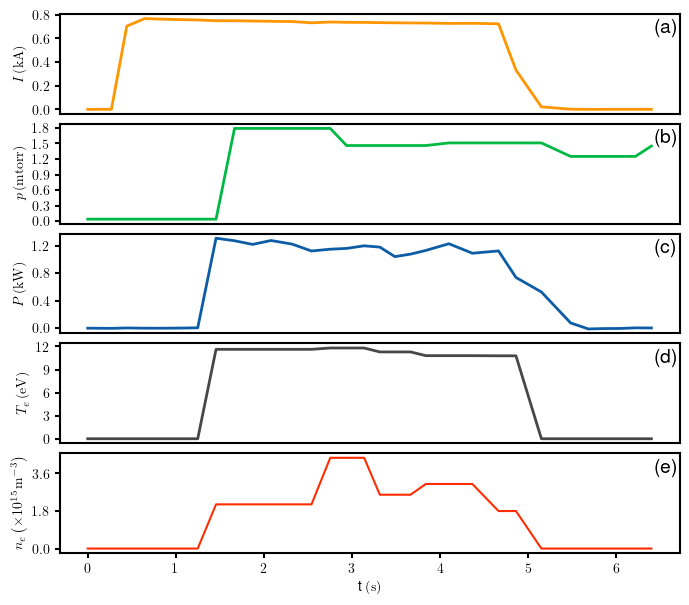

In [8]:
plot_descarga(t,p,P,I, Te, ne)

In [8]:
def plot_descarga1(t,p,P,I) :
    inicio = 53
    final  = -40
    t_descarga = t[inicio:final]
    delta_t = t_descarga - t_descarga[0]
    fig = plt.figure(figsize=(8,7))  # create a figure object
    fig.subplots_adjust(hspace=0.1, wspace=0.4)
    
    ax = fig.add_subplot(311)
    ax.plot(delta_t,I[inicio:final]/1000,'-', linewidth=2, color = '#FF9500' )
    ax.set_ylabel(r' $I \left( \si{\kilo \ampere} \right)$', 
                  fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
    ax.set_yticks(np.arange(0,0.8+0.1,0.2))
    ax.tick_params(labelbottom = False, bottom = False)
    
    ax.tick_params(axis='both', labelsize=14, width=1.5)
    plt.setp(ax.spines.values(), linewidth=1.5)
    ax.text(0.96,0.80, r"$\text{(a)}$", fontsize =14, fontdict=None, transform=ax.transAxes ) #Etiquetar gráfica
    
    ax1 = fig.add_subplot(312)
    ax1.plot(delta_t,p[inicio:final]*1000,'-', linewidth=2, color = '#00B945' )
    ax1.set_ylabel(r' $p \left(  \si{\milli torr} \right)$', 
                  fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
    ax1.set_yticks(np.arange(0,1.9,0.3))
    ax1.tick_params(labelbottom = False, bottom = False)
    
    ax1.tick_params(axis='both', labelsize=14, width=1.5)
    plt.setp(ax1.spines.values(), linewidth=1.5)
    ax1.text(0.96,0.80, r"$\text{(b)}$", fontsize =14, fontdict=None, transform=ax1.transAxes ) #Etiquetar gráfica
    
    ax2 = fig.add_subplot(313) #fila, columna, posición
    ax2.plot(delta_t,P[inicio:final]/1000,'-', linewidth=2, color = '#0C5DA5' )
    ax2.set_ylabel(r' $P \left( \si{\kilo\watt} \right)$', 
                  fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'})
    ax2.set_yticks(np.arange(0,1.6,0.4))
    ax2.set_xlabel(r'$t \left( \si{\second} \right)$',  
                  fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'black'}) 
    ax2.tick_params(axis='both', labelsize=14, width=1.5)
    plt.setp(ax2.spines.values(), linewidth=1.5)
    ax2.text(0.96,0.80, r"$\text{(c)}$", fontsize =14, fontdict=None, transform=ax2.transAxes ) #Etiquetar gráfica
    
    plt.savefig('descarga_SCR1.png', dpi=300, bbox_inches='tight') 
    
    plt.show()

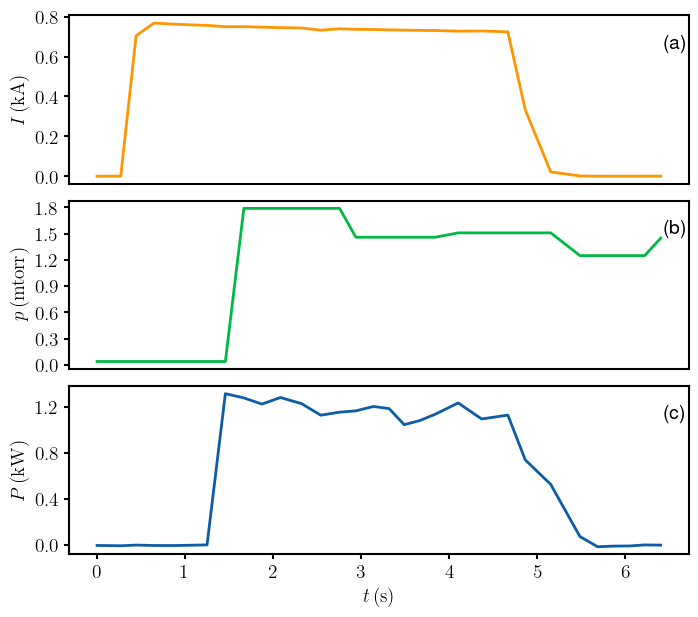

In [9]:
plot_descarga1(t,p,P,I)